<a href="https://colab.research.google.com/github/Mahithi08/Mental-Health-Survey-EDA-Analysis/blob/main/Mental-Health-Survey-EDA-Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name** - Mental Health Survey EDA Analysis

**Contribution By**

Mahithi

# **Project Summary -**

This project explores the results of a 2014 survey examining attitudes toward mental health and the prevalence of mental health disorders in the tech industry. The dataset, sourced from Open Sourcing Mental Illness (OSMI), includes self-reported responses from individuals working in tech-related roles worldwide. The primary aim of this project is to perform an exploratory data analysis (EDA) on a dataset related to mental health issues in the tees industry. The analysis focuses on understanding the prevalence, attitudes, and workplace support regarding mental health, with the goal of gaining insights that can inform policies and awareness efforts in the tech sector.

# **GitHub Link -**

https://github.com/Mahithi08/Mental-Health-Survey-EDA-Analysis

# **Problem Statement**



Mental health problems are prevalent in the tech industry, yet many professionals hesitate to seek help due to stigma or lack of support. This project explores workplace culture, employer support systems, and employee attitudes to uncover actionable insights that promote mental wellness in tech companies.

**Dataset Overview**

The dataset contains survey responses collected from employees in the tech industry regarding their experiences and perceptions of mental health.

Key features include:

Demographics: age, gender, country

Workplace context: remote work, company size, benefits, etc.

Mental health support: previous diagnosis, willingness to discuss with employer, treatment

Attitudes: perceived seriousness of mental health issues, comfort in discussing

# **General Guidelines : -**


1.Well-structured, formatted, and commented code has been written throughout the notebook.

2.The notebook is designed to be production-ready, with no execution errors and a logical flow from data loading to conclusion

3.Each code block is preceded by markdown explaining its purpose, and charts are described in terms of

Why the chart was selected

What insights were discovered

Whether the insight has business implications


4.A total of 20+ meaningful visualizations (Univariate, Bivariate, and Multivariate) are included, covering

# **Let's Begin !**

In [1]:
# classic importing of libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# choosing color palette
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

# **`1. Data Cleaning`**

In [2]:
# loading data into pandas dataframe and exploring columns and first rows
survey = pd.read_csv('/content/sample_data/survey.csv')
survey.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [3]:
# renaming columns to have all lowercase
survey.columns = [col.lower() for col in survey.columns]

# looking at dtypes, we can see all of them are pandas objects except for age that is int.
print(survey.dtypes)

timestamp                    object
age                           int64
gender                       object
country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object





* after exploring some of the columns I have decided not to use the timestamp, country, state or comments columns.





* i don't think there are is not enough data to do a geographical analysis.



In [4]:
survey.drop(['timestamp', 'state', 'comments', 'country'], axis= 1, inplace= True)

In [5]:
# after finding some weird responses in the age column ('such as 99999999 and -1729')
# i decided to only include 'valid' numbers for age
survey['age'] = survey['age'].apply(lambda x: x if 0 < x < 100 else np.nan)

In [6]:
# gender is one big mess of data but I believe in myself.
# first lower case and strip eveything to decrease options
survey['gender'] = survey['gender'].apply(lambda x: x.lower().strip())

# based on the replies made these lists manually, I hope to not offend anyone.
male = ['male', 'm', 'make', 'cis male', 'man', 'cis man', 'msle', 'malr', 'mail', 'maile', 'something kinda male?', 'ostensibly male, unsure what that really means', 'male-ish', 'guy (-ish) ^_^', 'mal', 'male (cis)']
female = ['female', 'f', 'woman', 'female (cis)', 'cis-female/femme', 'femake', 'cis female', 'femail']

def regender(gender_input):

    """
    Input: a string about gender
    Output: male, female or other depending on our dictionary

    """
    if gender_input in male:
        return 'male'
    elif gender_input in female:
        return 'female'
    else:
        return 'other'

survey['gender'] = survey['gender'].apply(regender)

# check our final results
survey.gender.value_counts(dropna= False)

,count
gender,
male,994
female,247
other,18


In [7]:
# checking for nans
nan_cols = []
for col in survey.columns:
    if survey[col].isnull().sum():
        print(col + ' (%): ' + str(sum(survey[col].isnull())/len(survey)))
        nan_cols += [col]

# nans are present in the self-employed column and in the work_interfere column.
# at most there are 20% of values with nans so we'll replace with 'Don't know'
for col in nan_cols:
    survey[col].fillna("Don't know", inplace= True)

# i'm just gonna drop the rows without age.
survey = survey[survey.age != "Don't know"]

# in the context of our questions we need to drop everyone who is self-employed
print(survey['self_employed'].value_counts())
survey.loc[survey['self_employed'] == 'Yes'] = np.nan
survey.dropna(inplace=True)

age (%): 0.003971405877680699
self_employed (%): 0.014297061159650517
work_interfere (%): 0.2096902303415409
self_employed
No            1092
Yes            144
Don't know      18
Name: count, dtype: int64


/tmp/ipython-input-7-763136699.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  survey[col].fillna("Don't know", inplace= True)
/tmp/ipython-input-7-763136699.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Don't know' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  survey[col].fillna("Don't know", inplace= True)
/tmp/ipython-input-7-763136699.py:19: SettingWithCopyWarning: 
A value is trying t



*   it seems the rest of the columns are questions that might be yes or no, with few additional options

*   we can identify that by checking the possible answers in each question



In [8]:
# getting unique answers for every column
exclude = ['age']
possible_answers = {col:[i for i in survey[col].unique()] for col in survey.columns if col not in exclude}
possible_answers

{'gender': ['female', 'male', 'other'],
 'self_employed': ["Don't know", 'No'],
 'family_history': ['No', 'Yes'],
 'treatment': ['Yes', 'No'],
 'work_interfere': ['Often', 'Rarely', 'Never', 'Sometimes', "Don't know"],
 'no_employees': ['6-25',
  'More than 1000',
  '26-100',
  '100-500',
  '1-5',
  '500-1000'],
 'remote_work': ['No', 'Yes'],
 'tech_company': ['Yes', 'No'],
 'benefits': ['Yes', "Don't know", 'No'],
 'care_options': ['Not sure', 'No', 'Yes'],
 'wellness_program': ['No', "Don't know", 'Yes'],
 'seek_help': ['Yes', "Don't know", 'No'],
 'anonymity': ['Yes', "Don't know", 'No'],
 'leave': ['Somewhat easy',
  "Don't know",
  'Somewhat difficult',
  'Very difficult',
  'Very easy'],
 'mental_health_consequence': ['No', 'Maybe', 'Yes'],
 'phys_health_consequence': ['No', 'Yes', 'Maybe'],
 'coworkers': ['Some of them', 'No', 'Yes'],
 'supervisor': ['Yes', 'No', 'Some of them'],
 'mental_health_interview': ['No', 'Yes', 'Maybe'],
 'phys_health_interview': ['Maybe', 'No', 'Yes']



*   after looking at these answer possibilities want to normalize all 'half-answers' to 'Don't know', so changing 'Not sure' and 'Maybes'

*  this decision might be open for interpretation, but I made a judgement call for the sake of consistency


In [9]:
def replace_uncertainty(survey_answer):
    """
    Uniformizes all uncertain answers.
    Input: half-answer (string)
    Output: 'Don't know'

    """

    uncertainty = ['Maybe', 'Some of them', 'Not sure']
    if survey_answer in uncertainty:
        return "Don't know"
    else:
        return survey_answer

# apply function to all columns
for col in survey.columns:
    survey[col] = survey[col].apply(replace_uncertainty)



*   the column 'care_options' asks the question: "Do you know the options for mental health care your employer provides?" and about 30% of the answers are 'Dont know'.

*  in my opinion: if the answer to a question 'Do you know?' is 'I don't know' - then the answer is No.



In [10]:
survey['care_options'] = survey['care_options'].replace(to_replace="Don't know", value= 'No')
survey['care_options'].value_counts()

,count
care_options,
No,730
Yes,380


# **2. Exploratory Data Analysis**

I was trying to come up with a question to ask the data but I wasn't feeling very creative. So I'm gonna do an agnostic analysis and just make a correlation matrix bewteen all the variables.



1.   The first thing I'll do is encode all the answers as numbers.


In [11]:
# create a dictionary to map out all the answers in the survey
encoding_dict = {'No': -1, "Don't know": 0, 'Yes': 1,
                 'Never': -2, 'Rarely': -1, 'Sometimes': 1, 'Often': 2,
                 'Very difficult': -2, 'Somewhat difficult': -1, 'Somewhat easy': 1, 'Very easy': 2,
                 '1-5': 0, '6-25': 1, '26-100': 2, '100-500': 3, '500-1000': 4, 'More than 1000': 5,
                 'male': -1, 'other': 0, 'female': 1}

In [12]:
# made a copy just to check values
survey_coded = survey.copy()

# for each column except the ones not excluded change the values in our dictionary
for col in survey_coded.columns:
    if col not in exclude:
        survey_coded[col] = survey_coded[col].map(encoding_dict)

In [13]:
# let's take a look at our answer-encoded dataframe.
survey_coded

,age,gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37.0,1,0,-1,1,2,1,-1,1,1,...,1,1,-1,-1,0,1,-1,0,1,-1
1,44.0,-1,0,-1,-1,-1,5,-1,-1,0,...,0,0,0,-1,-1,-1,-1,-1,0,-1
2,32.0,-1,0,-1,-1,-1,1,-1,1,-1,...,0,-1,-1,-1,1,1,1,1,-1,-1
3,31.0,-1,0,1,1,2,2,-1,1,-1,...,-1,-1,1,1,0,-1,0,0,-1,1
4,31.0,-1,0,-1,-1,-2,3,1,1,1,...,0,0,-1,-1,0,1,1,1,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26.0,-1,-1,-1,1,0,2,-1,1,-1,...,0,1,-1,-1,0,0,-1,-1,0,-1
1255,32.0,-1,-1,1,1,2,2,1,1,1,...,1,-1,-1,-1,0,1,-1,-1,1,-1
1256,34.0,-1,-1,1,1,1,5,-1,1,1,...,0,-1,1,1,-1,-1,-1,-1,-1,-1
1257,46.0,1,-1,-1,-1,0,3,1,1,-1,...,0,0,1,-1,-1,-1,-1,-1,-1,-1




*  because I'm still not feeling very creative, I'm gonna make a correlation matrix across all the variables in the study

In [14]:
# make the correlation matrix
correlation = survey_coded.corr()

<Axes: >

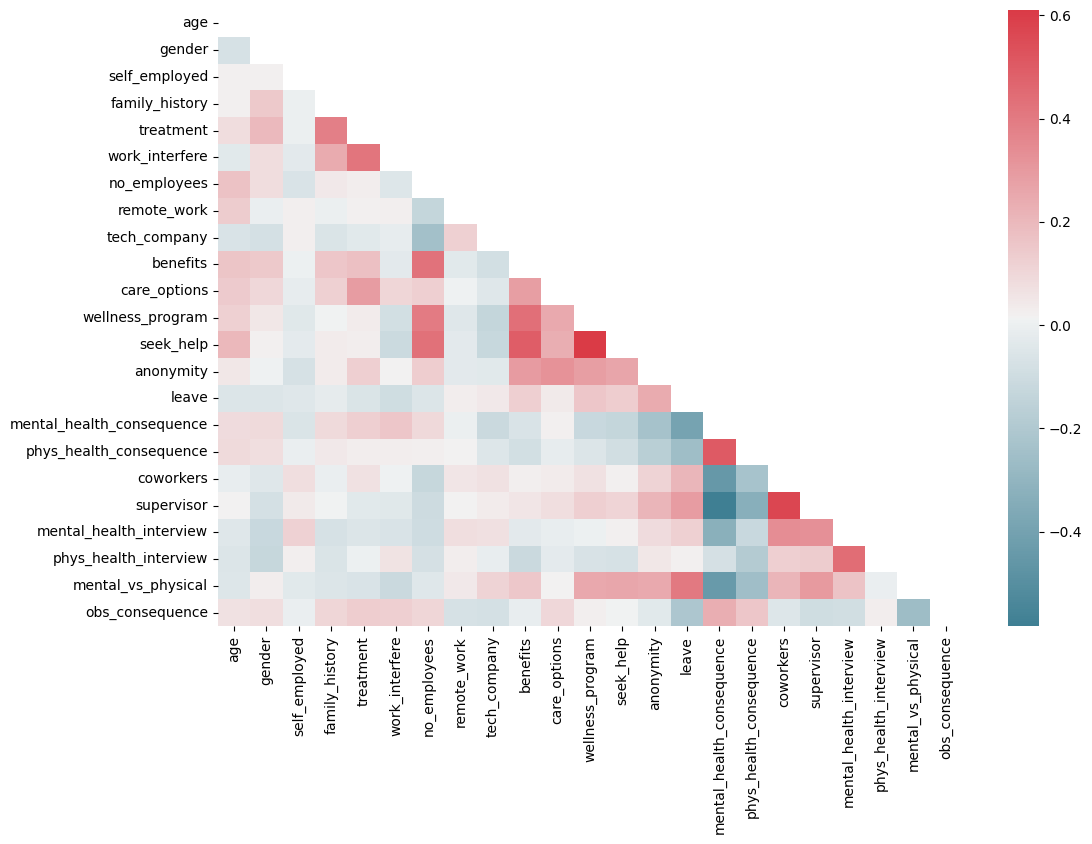

In [15]:
# making a mask to only show half the table cause its duplicated.
mask = np.triu(np.ones_like(correlation, dtype=np.bool))

# choosing colors
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# creating the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, cmap=cmap, mask=mask, annot= False)



*  This plot is very pretty but I've come to the realization that it is useless to me. there are way too many variables. It's hard to consider what is important or not and I don't have the know-how yet to disentangle all of this.



## **3. Hypothesis-driven analysis**

To create a score for the willingness to speak, we combined all the columns that ask 'If you're willing to speak to someone about mental health


Following the same logic, I combined all the columns that ask about services provided by the company

We combined these columns by adding them together, it was important to make sure they all 'move in the same direction' The result of this are two columns:



1.  'workplace_resources': with a possible value ranging from -6 to 6 and is the score of the company

2.  'willingness': with a possible values ranging from -3 to 3 and is the metric of the employee



In [16]:
# define columns to combine
workplace_resources = ['benefits',
                      'wellness_program',
                      'anonymity',
                      'seek_help',
                      'leave']

willingness = ['coworkers',
               'supervisor',
               'mental_health_interview']

# add columns together
survey_coded['workplace_resources'] = survey_coded.benefits + survey_coded.wellness_program + survey_coded.seek_help + survey_coded.leave + survey_coded.anonymity
survey_coded['willingness'] = survey_coded.coworkers + survey_coded.supervisor + survey_coded.mental_health_interview

In [22]:
# gonna define a function to make a nice looking histogram

def pretty_histogram(data, colname, label, save= False):

    """
    Input: data (pandas dataframe), column name (str), x label (str), save (bool)
    Output: a pretty histogram
    """

    hist = sns.histplot(data=data,
                        x=colname,
                        bins = data[colname].max() - data[colname].min() + 1,
                        kde= False,
                        color=flatui[-2])

    hist.set(xlabel= label, ylabel= 'Count')
    sns.despine()

    if save:
        figure = hist.get_figure()
        figure.savefig('figures/' + colname + "_hist.png")

/tmp/ipython-input-17-3265022726.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  hist = sns.distplot(data[colname],


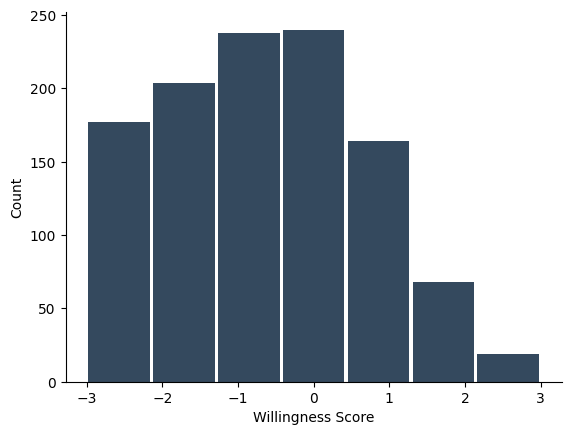

In [18]:
# make a histogram for our newly created 'Willingness' variable.
pretty_histogram(survey_coded, 'willingness', 'Willingness Score', save= False)

This looks like a right skewed distribution, meaning that the majority of people are unwilling to talk about mental health in their work environment.

**Before moving forwards, one of the first questions we can ask is: does having more mental health services mean that your employees are aware these services exist?**

In [24]:
# interestingly to check the proportion of people aware of services I needed to recode the values in the
# care options column from 'No' = -1 to 'No' = 0
survey_coded['care_options'].replace(to_replace=-1, value=0, inplace= True)
survey_coded.pivot_table(index=['workplace_resources'], values=['care_options'], aggfunc= lambda x: sum(x)/len(x))

/tmp/ipython-input-24-2671658955.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  survey_coded['care_options'].replace(to_replace=-1, value=0, inplace= True)


,care_options
workplace_resources,
-6,0.400000
-5,0.441176
-4,0.333333
-3,0.215686
-2,0.180000
-1,0.176166
0,0.252809
1,0.377358
2,0.432990


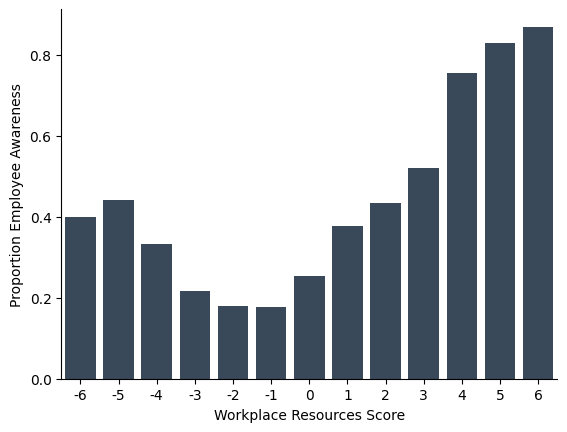

In [25]:
# plot proportions of people that know about care options for each score of workplace resource.

label = 'Workplace Resources Score'

bars = sns.barplot(x='workplace_resources', y='care_options', data= survey_coded,
                   ci= None, color= flatui[4])

bars.set(xlabel= label, ylabel= 'Proportion Employee Awareness')
sns.despine()
figure = bars.get_figure()
figure.savefig('figures/resources_and_awareness.png')



*   This is a really interesting result, kind of U-shaped.
*   One possible interpretation is that the more services are available, more people know about them, and where there's none people ALSO know that.





*   before moving on with our analysis, I would like to see what's the behavior of our willingness score according to some other variables, such as family history, treatment and work interfere



In [26]:
# group by variable of interest, create a label and rename columns
family_data = survey_coded.groupby('family_history').agg({'willingness':'mean'}).reset_index()
family_data['label'] = ['Family History']*len(family_data)
family_data.rename(columns= {'family_history':'Answer'}, inplace=True)

treatment_data = survey_coded.groupby('treatment').agg({'willingness':'mean'}).reset_index()
treatment_data['label'] = ['Treatment']*len(treatment_data)
treatment_data.rename(columns= {'treatment':'Answer'}, inplace=True)

willingness_variables = pd.concat([family_data, treatment_data], axis=0)
willingness_variables.Answer.replace(to_replace=-1, value='No', inplace=True)
willingness_variables.Answer.replace(to_replace=1, value='Yes', inplace=True)

/tmp/ipython-input-26-3362891454.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  willingness_variables.Answer.replace(to_replace=-1, value='No', inplace=True)


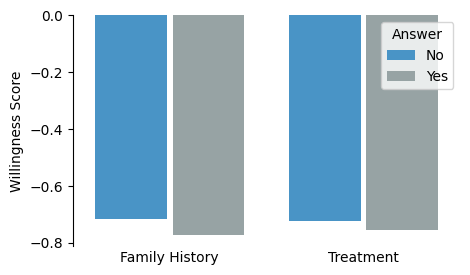

In [27]:
# making a category bar plot
fig, ax = plt.subplots(figsize=(5, 3))

bars= sns.barplot(x="label", y="willingness", hue="Answer",
            palette= sns.color_palette(flatui[1:3]),
            data=willingness_variables)

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)


change_width(ax, .37)
sns.despine(bottom=True)
bars.set(xlabel= '', ylabel= 'Willingness Score')
bars.tick_params(axis='x', which='both', length=0)
figure = bars.get_figure()
figure.savefig('figures/history_treatment_willingness.png')

/tmp/ipython-input-28-797012715.py:5: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0.75}` instead.

  bars = sns.barplot(x= 'work_interfere', y= 'willingness', data= survey_coded, color= flatui[-1], errwidth=0.75)
/tmp/ipython-input-28-797012715.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bars.set(xlabel= xlabel, ylabel= ylabel, xticklabels=['Never', 'Rarely', "Don't know", 'Sometimes', 'Often'])
/tmp/ipython-input-28-797012715.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bars.set_xticklabels(['Never', 'Rarely', "Don't know", 'Sometimes', 'Often'], rotation=30)


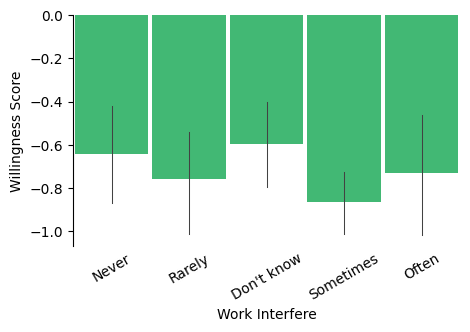

In [28]:
xlabel = 'Work Interfere'
ylabel = 'Willingness Score'

fig, ax = plt.subplots(figsize=(5, 3))
bars = sns.barplot(x= 'work_interfere', y= 'willingness', data= survey_coded, color= flatui[-1], errwidth=0.75)

bars.set(xlabel= xlabel, ylabel= ylabel, xticklabels=['Never', 'Rarely', "Don't know", 'Sometimes', 'Often'])
bars.set_xticklabels(['Never', 'Rarely', "Don't know", 'Sometimes', 'Often'], rotation=30)
bars.set()
sns.despine(bottom= True)
change_width(ax, .95)
bars.tick_params(axis='x', which='both', length=0)

figure = bars.get_figure()
figure.savefig('figures/work_interfere_willingness.png')

In [29]:
# I also did this analysis for gender but I find it slightly less interesting.
gender_willingness = survey_coded.groupby('gender').agg({'willingness':'mean'})
gender_willingness

,willingness
gender,
-1,-0.659404
0,-0.615385
1,-1.053333


**contrary to expected, it seems that women are less likely to open up about mental health. However, upon further thinking, this might make sense if we consider that tech is a male-dominated industry where perhaps climbing up the ladder as a woman is significantly harder. in that case, they would be much more scared to bring up these issues and make their lives ever harder?**

In [30]:
# to reach the answer to our main question
willingness_treatment = survey_coded.groupby('workplace_resources').agg({'willingness':'mean'})
willingness_treatment

,willingness
workplace_resources,
-6,-2.600000
-5,-1.323529
-4,-1.000000
-3,-1.333333
-2,-0.820000
-1,-0.782383
0,-0.752809
1,-0.641509
2,-0.453608


/tmp/ipython-input-31-1621852444.py:6: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0.75}` instead.

  bars = sns.barplot(x='workplace_resources', y='willingness', data= survey_coded,


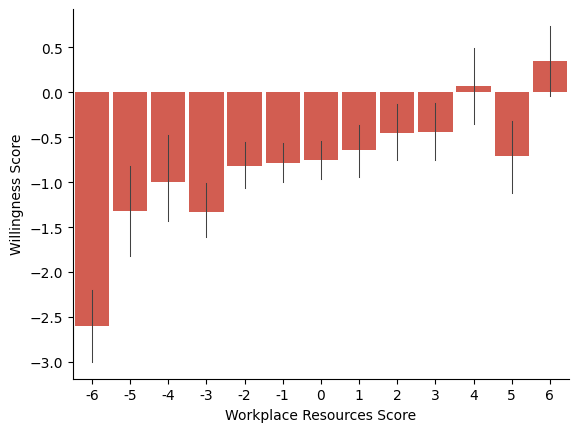

In [31]:
# create a bar plot with the average willingness score for each workplace resourses category
xlabel = 'Workplace Resources Score'
ylabel = 'Willingness Score'

fig, ax = plt.subplots()
bars = sns.barplot(x='workplace_resources', y='willingness', data= survey_coded,
                   color= flatui[3], errwidth=0.75)

bars.set(xlabel= xlabel, ylabel= ylabel)
sns.despine()
change_width(ax, .9)
figure = bars.get_figure()
figure.savefig('figures/resources_willingness.png')



*   it looks like the average willingness score goes up the more resources are available in the company! which is pretty cool

*  to try and get some statistical power on this we took the raw data and tried to make a linear regression to see if we could predict the willing score of a person using workplace resources.



In [32]:
# linear regression
x = survey_coded['workplace_resources']
y = survey_coded['willingness']

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))
print ('The r_value is: ' + str(r_value**2))
print ('The std error is: ' + str(std_err))
print(p_value)

The slope is: 0.12535971814234542
The intercept is: -0.7280097538526822
The r_value is: 0.04472502650135226
The std error is: 0.017405120068387715
1.0900374877249522e-12


# **Conclusion**

The analysis of the Mental Health in Tech Survey highlights a pressing need for better mental health awareness, support, and inclusion within the tech industry. While many employees experience mental health challenges, stigma, lack of resources, and organizational silence often prevent them from seeking help.